In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import random
import scipy
import scipy.stats

In [2]:
#generating the fake measurement centered in 1 with sigma 0.2
sigma=0.2
mu=1
N=10

distG=scipy.stats.norm(loc=mu,scale=sigma)
sample=distG.rvs(N)

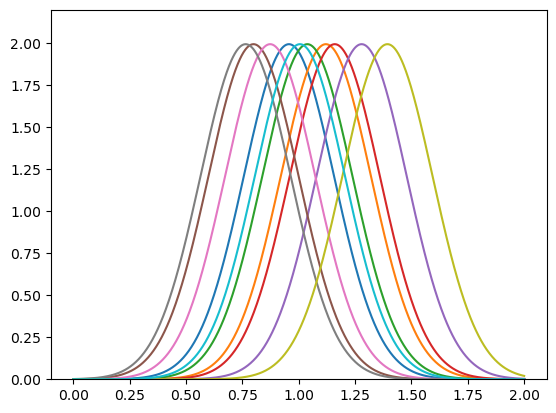

In [13]:
M=1000
#mu_gen=np.linspace(0.7,1.3,M) #generating a distribution of mean values

#definition of gaussian
def gauss(x,m,s):
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-m)**2/(2*s**2))

#linspace in x from -3*sigma to +3*sigma
x=np.linspace(mu-5*sigma,mu+5*sigma,M)

L=np.ones(M)

for i in range(0,N):
    #evaluating the value in y in the gaussian
    y=np.array((gauss(x,sample[i],sigma)))

    #taking the product of the likelihoods
    L = L*y
        
    plt.plot(x,y)
    #plt.xlim([0,2])
    plt.ylim([0,2.2])

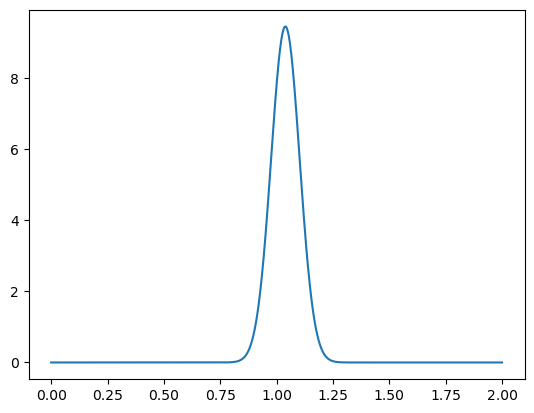

In [14]:
#plot the distribution of the product
plt.plot(x,L)
plt.show()

In [15]:
#found the maximum value of the likelihood product
print(np.argsort(L))
index_maxL=(np.argsort(L))[len(L)-1]
x_maxL=x[index_maxL]
print(x_maxL)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38 999  39 998  40 997  41 996  42 995  43 994  44 993  45 992
  46 991  47 990  48 989  49 988  50 987  51 986  52 985  53 984  54 983
  55 982  56 981  57 980  58 979  59 978  60 977  61 976  62 975  63 974
  64 973  65 972  66 971  67 970  68 969  69 968  70 967  71 966  72 965
  73 964  74 963  75 962  76 961  77 960  78 959  79 958  80 957  81 956
  82 955  83 954  84 953  85 952  86 951  87 950  88 949  89 948  90 947
  91 946  92 945  93 944  94 943  95 942  96 941  97 940  98 939  99 938
 100 937 101 936 102 935 103 934 104 933 105 932 106 931 107 930 108 929
 109 928 110 927 111 926 112 925 113 924 114 923 115 922 116 921 117 920
 118 919 119 918 120 917 121 916 122 915 123 914 124 913 125 912 126 911
 127 910 128 909 129 908 130 907 131 906 132 905 133 904 134 903 135 902
 136 901 137 900 138 899 139 898 140 897 141 896 14

In [18]:
#formula for MLE
mu_MLE=np.mean(sample)
print(mu_MLE)

1.0389692130912416


In [21]:
#difference of the two values
diff=np.abs(mu_MLE-x_maxL)
print(diff)
print(diff/sigma)

6.982594779736395e-05
0.00034912973898681976


In [28]:
#doing second derivative of L
L2=np.diff(np.log(L), n=2)

In [29]:
#matrix error estimated
F=1/np.sqrt((-1*L2/((x[1]-x[0])**2)))[index_maxL]
print(F)

0.06324555320336102


In [32]:
#fisher metric
MLE_sigma=sigma/np.sqrt(N)
print(MLE_sigma)

0.06324555320336758


In [33]:
#difference in the sigma
print(np.abs(MLE_sigma-F))

6.564193633096238e-15


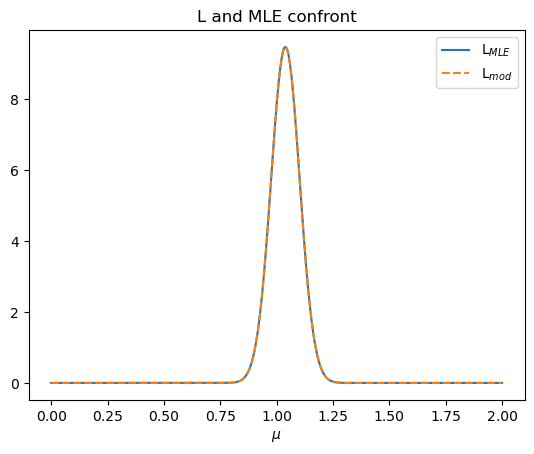

In [47]:
#confront of the MLE gaussian found and the Likelihood
MLE_L = gauss(x,mu_MLE,MLE_sigma)  
plt.plot(x,MLE_L*(L.max()/MLE_L.max()), label='L$_{MLE}$') #factor to rinormalize
plt.plot(x,L, ls='dashed', label='L$_{mod}$')
plt.legend()
plt.xlabel('$\mu$')
plt.title('L and MLE confront')
plt.show()